In [1]:
import os
import psycopg2
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'tahoma'

In [2]:
# Load environment variables from .env file
load_dotenv()

# Retrieve environment variables
host = os.getenv("HOST")
port = os.getenv("PORT")
database = os.getenv("DATABASE")
user = os.getenv("DB_USER")
password = os.getenv("DB_PASS")

# Construct the connection string
connection_string = f"host={host} port={port} dbname={database} user={user} password={password}"

In [3]:
# Connect to the PostgreSQL database
try:
    connection = psycopg2.connect(connection_string)
    cursor = connection.cursor()
    print("Connected to the PostgreSQL database!")

    # Execute queries
    query = "SELECT * FROM cons_by_district;"
    cursor.execute(query)
    raw_data = cursor.fetchall()

    # Don't forget to close the cursor and connection when done
    cursor.close()
    connection.close()

except psycopg2.Error as e:
    print("Error connecting to the database:", e)

Connected to the PostgreSQL database!


In [4]:
# Convert fetched data into df
column_names = [desc[0] for desc in cursor.description]
df = pd.DataFrame(raw_data, columns=column_names)
df = df.sort_values(by=['id','YYMM'])
df

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
10521,1,10,กรุงเทพมหานคร,01,พระนคร,2,BUSINESS,249666,2022-01-01,1
3,2,10,กรุงเทพมหานคร,01,พระนคร,3,INDUSTRY,7204,2022-01-01,1
4,3,10,กรุงเทพมหานคร,01,พระนคร,4,ENTERTAIN,38717,2022-01-01,1
5,4,10,กรุงเทพมหานคร,01,พระนคร,5,GOVERNMENT,47321,2022-01-01,1
6,5,10,กรุงเทพมหานคร,01,พระนคร,6,INSTITUTION,4709,2022-01-01,1
...,...,...,...,...,...,...,...,...,...,...
10516,10761,10,กรุงเทพมหานคร,20,บางกอกน้อย,4,ENTERTAIN,62583,2021-10-01,1
10517,10762,10,กรุงเทพมหานคร,21,บางขุนเทียน,8,MWA,222,2021-10-01,1
10518,10763,10,กรุงเทพมหานคร,32,ประเวศ,2,BUSINESS,513405,2021-10-01,1
10519,10764,10,กรุงเทพมหานคร,35,จอมทอง,7,CONSTRUCT,21439,2021-10-01,1


In [6]:
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
10521,1,10,กรุงเทพมหานคร,01,พระนคร,2,BUSINESS,249666,2022-01-01,1
3,2,10,กรุงเทพมหานคร,01,พระนคร,3,INDUSTRY,7204,2022-01-01,1
4,3,10,กรุงเทพมหานคร,01,พระนคร,4,ENTERTAIN,38717,2022-01-01,1
5,4,10,กรุงเทพมหานคร,01,พระนคร,5,GOVERNMENT,47321,2022-01-01,1
6,5,10,กรุงเทพมหานคร,01,พระนคร,6,INSTITUTION,4709,2022-01-01,1
...,...,...,...,...,...,...,...,...,...,...
10516,10761,10,กรุงเทพมหานคร,20,บางกอกน้อย,4,ENTERTAIN,62583,2021-10-01,1
10517,10762,10,กรุงเทพมหานคร,21,บางขุนเทียน,8,MWA,222,2021-10-01,1
10518,10763,10,กรุงเทพมหานคร,32,ประเวศ,2,BUSINESS,513405,2021-10-01,1
10519,10764,10,กรุงเทพมหานคร,35,จอมทอง,7,CONSTRUCT,21439,2021-10-01,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10765 entries, 10521 to 10520
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                10765 non-null  int64         
 1   province_code     10581 non-null  object        
 2   province_name     10581 non-null  object        
 3   amphur_code       10581 non-null  object        
 4   amphur_name       10559 non-null  object        
 5   class_group_code  10765 non-null  object        
 6   class_group_name  10765 non-null  object        
 7   consumption       10765 non-null  int64         
 8   YYMM              10765 non-null  datetime64[ns]
 9   status            10765 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(7)
memory usage: 925.1+ KB


In [8]:
cleaned_df = df.dropna(subset=['province_code','amphur_code'],how='any')
cleaned_df = cleaned_df.sort_values(by=['YYMM','province_code','amphur_code','id'])
cleaned_df

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
5397,5533,10,กรุงเทพมหานคร,01,พระนคร,4,ENTERTAIN,33640,2021-10-01,1
5398,5534,10,กรุงเทพมหานคร,01,พระนคร,5,GOVERNMENT,46032,2021-10-01,1
5399,5535,10,กรุงเทพมหานคร,01,พระนคร,6,INSTITUTION,4042,2021-10-01,1
10577,5536,10,กรุงเทพมหานคร,01,พระนคร,7,CONSTRUCT,3210,2021-10-01,1
10578,5580,10,กรุงเทพมหานคร,01,พระนคร,2,BUSINESS,232488,2021-10-01,1
...,...,...,...,...,...,...,...,...,...,...
9058,9230,13,ปทุมธานี,06,ลำลูกกา,2,BUSINESS,1909,2023-07-01,1
5309,5429,24,ฉะเชิงเทรา,4,บางปะกง,1,RESIDENCE,937,2023-07-01,1
5310,5430,24,ฉะเชิงเทรา,4,บางปะกง,2,BUSINESS,57,2023-07-01,1
9019,9231,24,ฉะเชิงเทรา,4,บางปะกง,7,CONSTRUCT,8906,2023-07-01,1


In [9]:
cleaned_df['YYMM'] = pd.to_datetime(cleaned_df['YYMM'], format='%Y-%m-%d', errors='coerce')
# Filter out rows with NaT values (invalid dates)
cleaned_df = cleaned_df.dropna(subset=['YYMM'])
# Format the valid dates as 'mm/yy'
cleaned_df['YYMM'] = cleaned_df['YYMM'].dt.strftime("%m/%y")
cleaned_df

,id,province_code,province_name,amphur_code,amphur_name,class_group_code,class_group_name,consumption,YYMM,status
5397,5533,10,กรุงเทพมหานคร,01,พระนคร,4,ENTERTAIN,33640,10/21,1
5398,5534,10,กรุงเทพมหานคร,01,พระนคร,5,GOVERNMENT,46032,10/21,1
5399,5535,10,กรุงเทพมหานคร,01,พระนคร,6,INSTITUTION,4042,10/21,1
10577,5536,10,กรุงเทพมหานคร,01,พระนคร,7,CONSTRUCT,3210,10/21,1
10578,5580,10,กรุงเทพมหานคร,01,พระนคร,2,BUSINESS,232488,10/21,1
...,...,...,...,...,...,...,...,...,...,...
9058,9230,13,ปทุมธานี,06,ลำลูกกา,2,BUSINESS,1909,07/23,1
5309,5429,24,ฉะเชิงเทรา,4,บางปะกง,1,RESIDENCE,937,07/23,1
5310,5430,24,ฉะเชิงเทรา,4,บางปะกง,2,BUSINESS,57,07/23,1
9019,9231,24,ฉะเชิงเทรา,4,บางปะกง,7,CONSTRUCT,8906,07/23,1


In [26]:
pv_names = cleaned_df['province_name'].unique()
dataset = {}
i=0
for p, pv in enumerate(pv_names):
    dataset[pv] = {}
    ap_names = cleaned_df[cleaned_df['province_name'] == pv]['amphur_name'].unique()
    for a, ap in enumerate(ap_names):
        dataset[pv][ap] = {}
        cs_names = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap)]['class_group_name'].unique()
        for c, cs in enumerate(cs_names):
            sub_data = cleaned_df[(cleaned_df['province_name'] == pv) & (cleaned_df['amphur_name'] == ap) & (cleaned_df['class_group_name'] == cs)]
            if sub_data.shape[0] != 0:
                i+=1
                dataset[pv][ap][cs] = sub_data[['YYMM','consumption']].copy().reset_index(drop=True)
                dataset[pv][ap][cs].rename(columns={'YYMM':'MMYY','consumption': 'x'}, inplace=True)
                dataset[pv][ap][cs]['y'] = dataset[pv][ap][cs]['x'].shift(-1)
                dataset[pv][ap][cs] = dataset[pv][ap][cs][:-1]
            print(f'{i}:::{pv}-{ap}-{cs}--samples:{sub_data.shape[0]}')

1:::กรุงเทพมหานคร-พระนคร-ENTERTAIN--samples:22
2:::กรุงเทพมหานคร-พระนคร-GOVERNMENT--samples:22
3:::กรุงเทพมหานคร-พระนคร-INSTITUTION--samples:22
4:::กรุงเทพมหานคร-พระนคร-CONSTRUCT--samples:22
5:::กรุงเทพมหานคร-พระนคร-BUSINESS--samples:22
6:::กรุงเทพมหานคร-พระนคร-RESIDENCE--samples:22
7:::กรุงเทพมหานคร-พระนคร-INDUSTRY--samples:18
8:::กรุงเทพมหานคร-ดุสิต-BUSINESS--samples:22
9:::กรุงเทพมหานคร-ดุสิต-INDUSTRY--samples:22
10:::กรุงเทพมหานคร-ดุสิต-ENTERTAIN--samples:22
11:::กรุงเทพมหานคร-ดุสิต-GOVERNMENT--samples:22
12:::กรุงเทพมหานคร-ดุสิต-INSTITUTION--samples:22
13:::กรุงเทพมหานคร-ดุสิต-MWA--samples:22
14:::กรุงเทพมหานคร-ดุสิต-CONSTRUCT--samples:22
15:::กรุงเทพมหานคร-ดุสิต-RESIDENCE--samples:22
16:::กรุงเทพมหานคร-หนองจอก-BUSINESS--samples:22
17:::กรุงเทพมหานคร-หนองจอก-INDUSTRY--samples:22
18:::กรุงเทพมหานคร-หนองจอก-ENTERTAIN--samples:22
19:::กรุงเทพมหานคร-หนองจอก-GOVERNMENT--samples:22
20:::กรุงเทพมหานคร-หนองจอก-INSTITUTION--samples:22
21:::กรุงเทพมหานคร-หนองจอก-CONSTRUCT--samples:22
22:::ก

In [27]:
dataset['กรุงเทพมหานคร']['พระนคร']

{'ENTERTAIN':      MMYY      x        y
 0   10/21  33640  34443.0
 1   11/21  34443  36021.0
 2   12/21  36021  38717.0
 3   01/22  38717  37815.0
 4   02/22  37815  36878.0
 5   03/22  36878  42709.0
 6   04/22  42709  40410.0
 7   05/22  40410  40383.0
 8   06/22  40383  61408.0
 9   07/22  61408  74049.0
 10  08/22  74049  76512.0
 11  09/22  76512  71904.0
 12  10/22  71904  84248.0
 13  11/22  84248  82522.0
 14  12/22  82522  91233.0
 15  01/23  91233  93540.0
 16  02/23  93540  87298.0
 17  03/23  87298  95522.0
 18  04/23  95522  94092.0
 19  05/23  94092  91187.0
 20  06/23  91187  92406.0,
 'GOVERNMENT':      MMYY      x        y
 0   10/21  46032  44461.0
 1   11/21  44461  47007.0
 2   12/21  47007  47321.0
 3   01/22  47321  49274.0
 4   02/22  49274  41860.0
 5   03/22  41860  50095.0
 6   04/22  50095  49555.0
 7   05/22  49555  54866.0
 8   06/22  54866  47259.0
 9   07/22  47259  44045.0
 10  08/22  44045  47912.0
 11  09/22  47912  45856.0
 12  10/22  45856  60557.0


In [52]:
dataset['กรุงเทพมหานคร']['พระนคร']['RESIDENCE']['MMYY']

0     10/21
1     11/21
2     12/21
3     01/22
4     02/22
5     03/22
6     04/22
7     05/22
8     06/22
9     07/22
10    08/22
11    09/22
12    10/22
13    11/22
14    12/22
15    01/23
16    02/23
17    03/23
18    04/23
19    05/23
20    06/23
Name: MMYY, dtype: object

In [28]:
dataset['กรุงเทพมหานคร']['พระนคร']['RESIDENCE']['x']

0     164415
1     169733
2     167071
3     168906
4     172480
5     155949
6     173775
7     170614
8     176461
9     168600
10    168277
11    170881
12    163303
13    169114
14    166455
15    169580
16    173883
17    158743
18    182400
19    175517
20    181398
Name: x, dtype: int64

In [16]:
dataset['กรุงเทพมหานคร']['พระนคร']['RESIDENCE']['y']

0     169733.0
1     167071.0
2     168906.0
3     172480.0
4     155949.0
5     173775.0
6     170614.0
7     176461.0
8     168600.0
9     168277.0
10    170881.0
11    163303.0
12    169114.0
13    166455.0
14    169580.0
15    173883.0
16    158743.0
17    182400.0
18    175517.0
19    181398.0
20    174328.0
Name: y, dtype: float64

In [124]:
def mean_absolute_percent_error(y_true, y_pred):
    # Ensure that y_true and y_pred are numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Calculate the absolute percent error for each data point
    absolute_percent_error = np.abs((y_true - y_pred) / y_true)
    
    # Calculate the mean of the absolute percent errors and multiply by 100 to get the percentage
    mape = np.mean(absolute_percent_error) * 100
    
    return mape

coefficient of determination: 0.08127940343187057
intercept: 247968.40083178258
slope: [-0.29269418]
Mean Squared Error: 78762294.42716284
Mean Absolute Percent Error: 4.289713026641139
R-squared: 0.01802153442918586


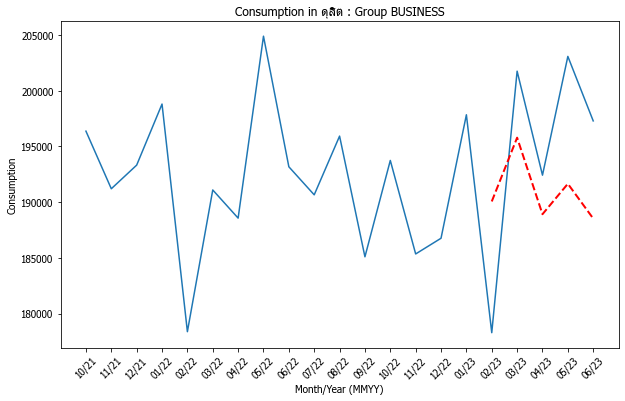

coefficient of determination: 0.7609167800594461
intercept: 598.0785477423879
slope: [0.88308085]
Mean Squared Error: 151291.23047528282
Mean Absolute Percent Error: 6.739261538399063
R-squared: -2.065017602593541


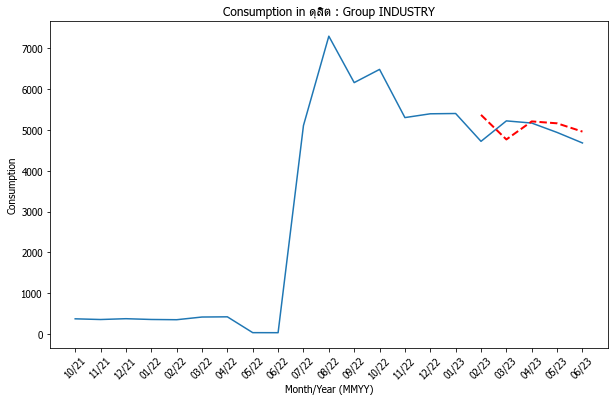

coefficient of determination: 0.7185466102242266
intercept: 5182.450995952622
slope: [0.7153287]
Mean Squared Error: 931910.0783650873
Mean Absolute Percent Error: 5.282096398629949
R-squared: -1.277843997324124


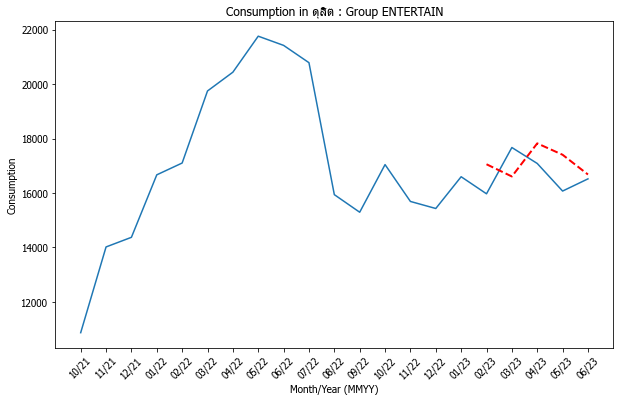

coefficient of determination: 0.0827430454642537
intercept: 181740.30244287904
slope: [0.27233545]
Mean Squared Error: 978343821.845821
Mean Absolute Percent Error: 8.34536925506966
R-squared: -1.4434583402481658


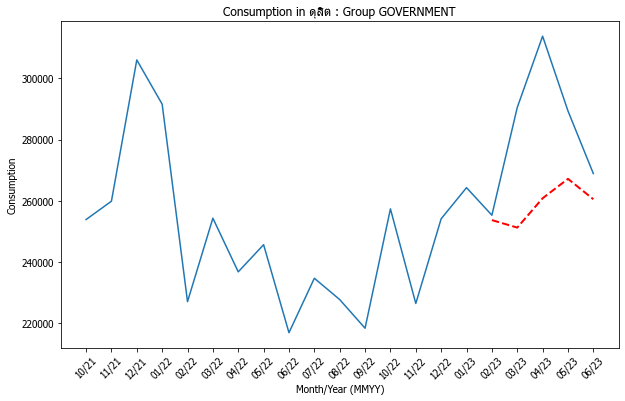

coefficient of determination: 0.7194896880710666
intercept: 12467.721349617233
slope: [0.8297246]
Mean Squared Error: 100466976.14803739
Mean Absolute Percent Error: 15.569573885068195
R-squared: -1.2197088805838754


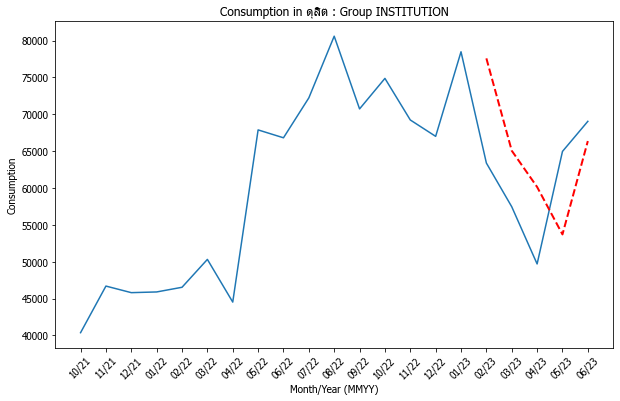

coefficient of determination: 0.06036386657810178
intercept: 816.2261920184541
slope: [0.28271311]
Mean Squared Error: 842772.8824542552
Mean Absolute Percent Error: 49.10083934568221
R-squared: -0.6395611889882984


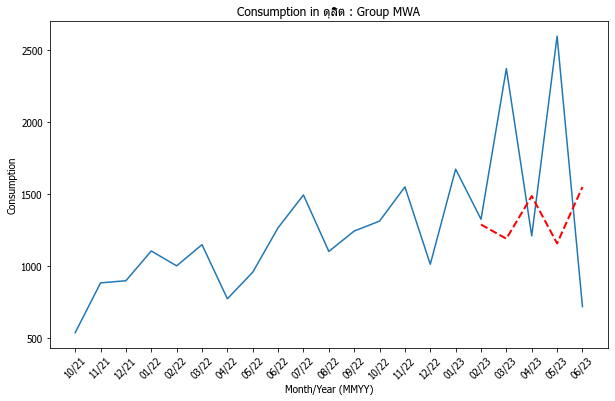

coefficient of determination: 0.6327749470758108
intercept: 4628.105876760706
slope: [0.43140896]
Mean Squared Error: 75742605.41961412
Mean Absolute Percent Error: 38.501121530876745
R-squared: -1.7431467822958608


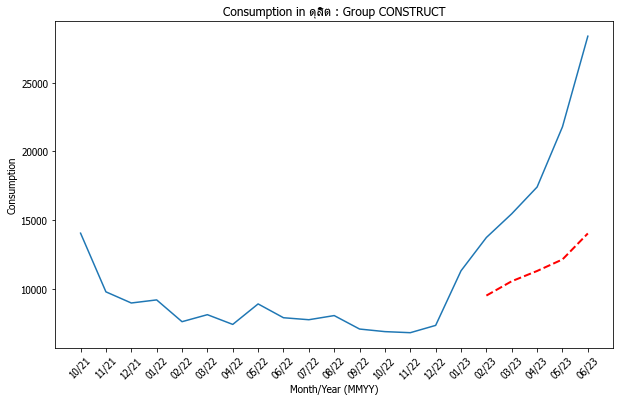

coefficient of determination: 0.002043973456313797
intercept: 383845.03075609077
slope: [-0.04425035]
Mean Squared Error: 450275982.412434
Mean Absolute Percent Error: 5.203006451594285
R-squared: -0.06152277930805483


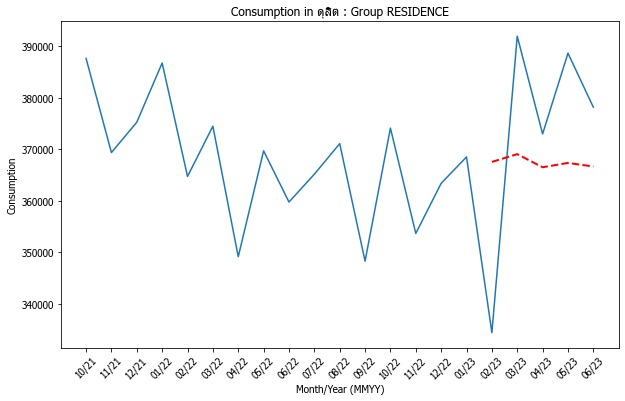

coefficient of determination: 0.17294670284889635
intercept: 255050.956946976
slope: [-0.37803486]
Mean Squared Error: 90708415.1369072
Mean Absolute Percent Error: 4.730279923672843
R-squared: -0.2703589016661314


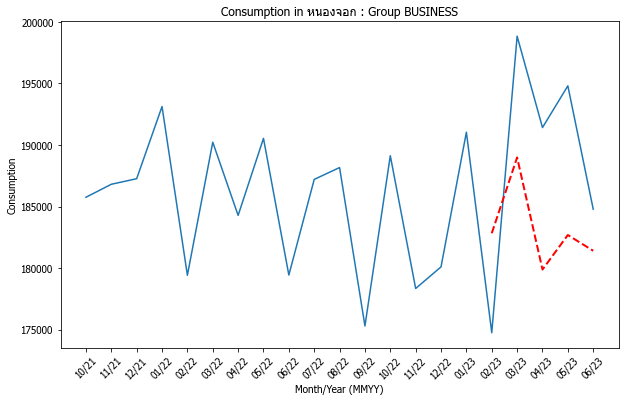

coefficient of determination: 0.08820148036238451
intercept: 114545.10375133058
slope: [0.2732368]
Mean Squared Error: 59853776.22920139
Mean Absolute Percent Error: 4.321704826746231
R-squared: -1.4994148201022517


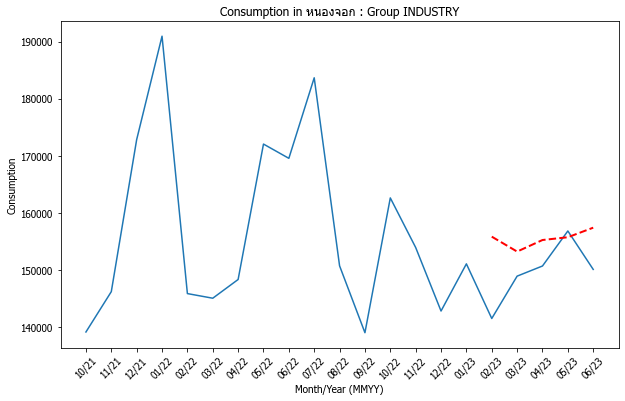

coefficient of determination: 0.8771724143993467
intercept: 496.96859390049804
slope: [0.97586151]
Mean Squared Error: 1261998.0605217672
Mean Absolute Percent Error: 9.659952835653629
R-squared: 0.1247999585605547


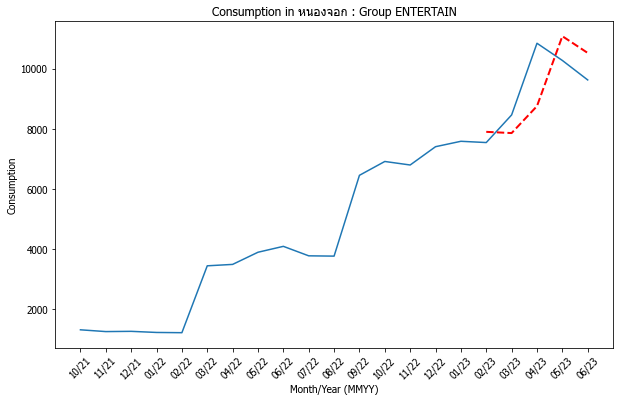

coefficient of determination: 0.5539262115347408
intercept: 52413.33587692407
slope: [0.79335631]
Mean Squared Error: 263140058.4644507
Mean Absolute Percent Error: 5.367336265325466
R-squared: -2.54862740617249


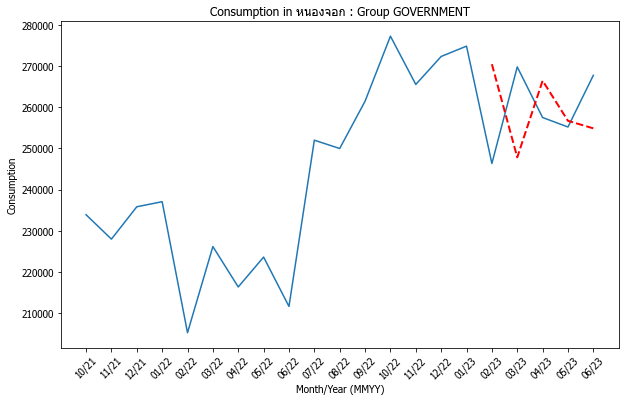

coefficient of determination: 0.46558938483392553
intercept: 7252.410393571585
slope: [0.71712984]
Mean Squared Error: 34461752.347335495
Mean Absolute Percent Error: 18.689942732755274
R-squared: -0.2470701510572686


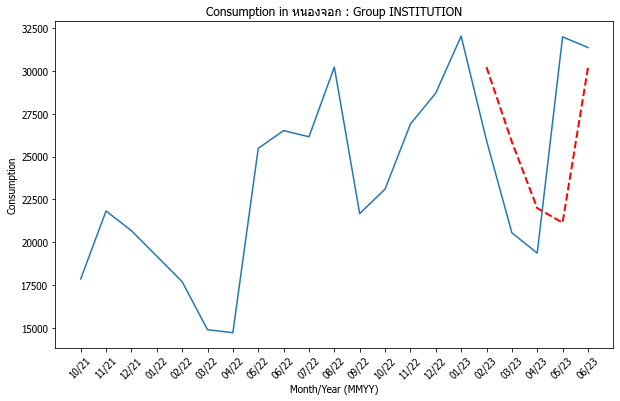

coefficient of determination: 0.19685872434229212
intercept: 21332.868254535697
slope: [0.51861195]
Mean Squared Error: 35507613.07028396
Mean Absolute Percent Error: 8.989610504212187
R-squared: -2.9595135473268277


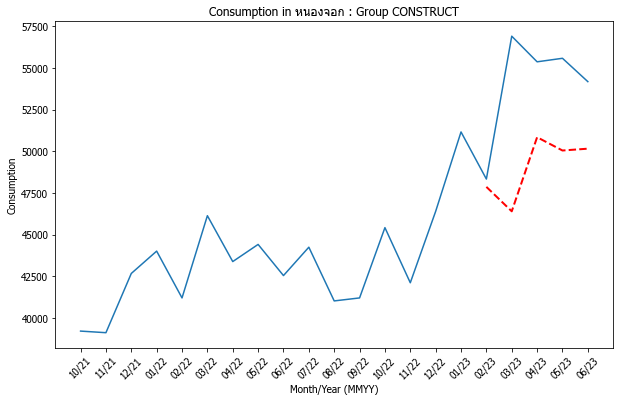

coefficient of determination: 0.09629024208850923
intercept: 1524448.1700988594
slope: [-0.31942156]
Mean Squared Error: 15125018636.982746
Mean Absolute Percent Error: 8.823371985530887
R-squared: -1.6263367704145417


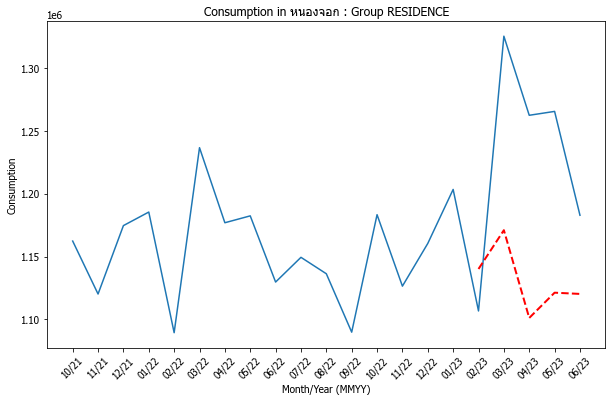

coefficient of determination: 0.01899015070279264
intercept: 122.59318377911994
slope: [-0.14322692]
Mean Squared Error: 53.3051656727074
Mean Absolute Percent Error: 7.047063814111983
R-squared: -13.176905764017928


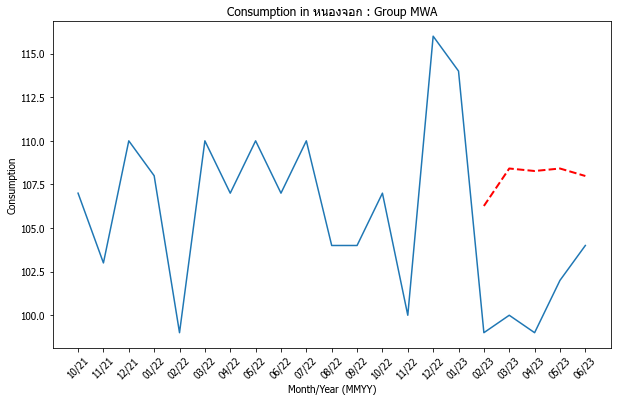

coefficient of determination: 0.17553976130565596
intercept: 580226.9349960445
slope: [-0.40885891]
Mean Squared Error: 1526447569.5781713
Mean Absolute Percent Error: 8.119601156435248
R-squared: -1.7298250459457747


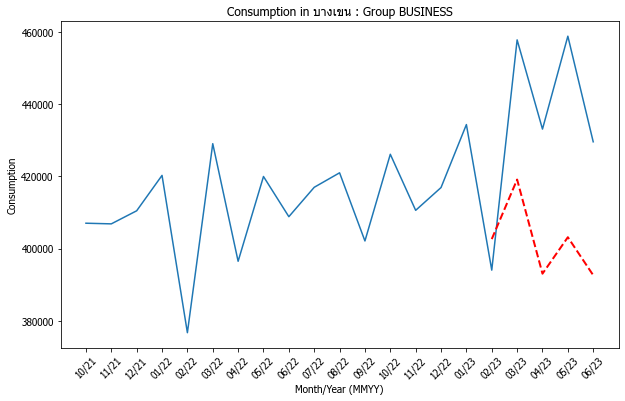

coefficient of determination: 0.004094136300906492
intercept: 23280.28167145314
slope: [0.06457527]
Mean Squared Error: 3374031.47606461
Mean Absolute Percent Error: 7.067599492918131
R-squared: -0.7579963892865729


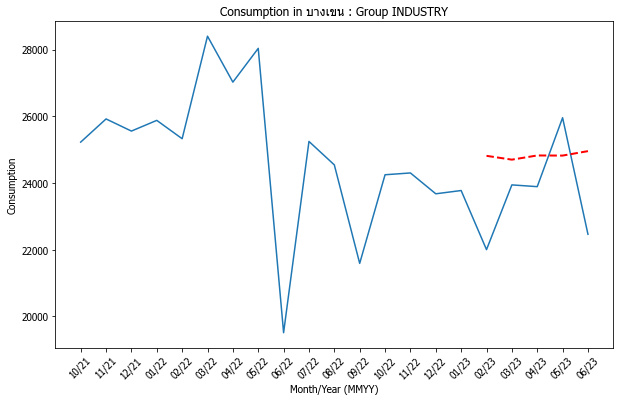

coefficient of determination: 0.009491022380351377
intercept: 48040.442390194425
slope: [-0.13272787]
Mean Squared Error: 175871586.95611352
Mean Absolute Percent Error: 22.160021581138967
R-squared: -6.4351291975152565


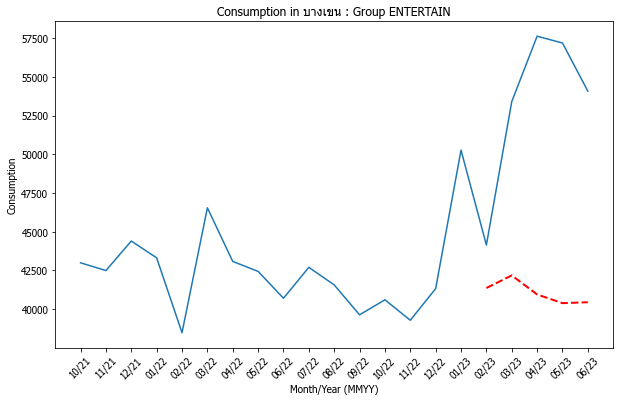

coefficient of determination: 0.5652154106966747
intercept: 8333.046362666144
slope: [0.84039746]
Mean Squared Error: 17649838.123155765
Mean Absolute Percent Error: 9.133752108956282
R-squared: -1.2469785643708358


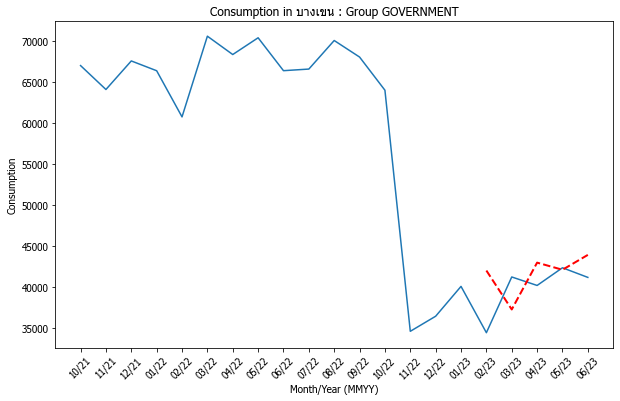

coefficient of determination: 0.19200312476410852
intercept: 28544.78632254587
slope: [0.44334785]
Mean Squared Error: 47220329.233145535
Mean Absolute Percent Error: 8.143116740690319
R-squared: -1.9987304036268525


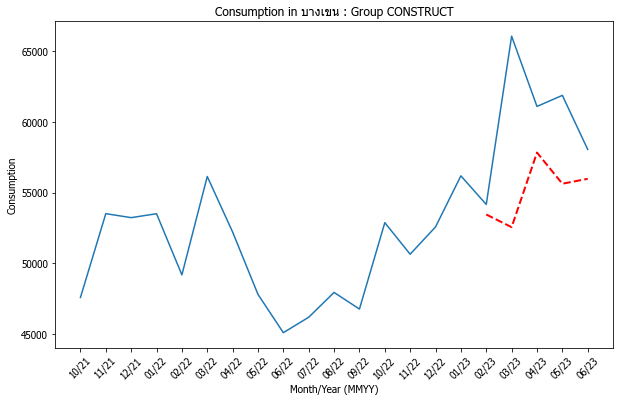

coefficient of determination: 0.226813756502368
intercept: 159.09626465408004
slope: [0.47538858]
Mean Squared Error: 1773.4271004197763
Mean Absolute Percent Error: 9.230445268414979
R-squared: -0.9725786399045382


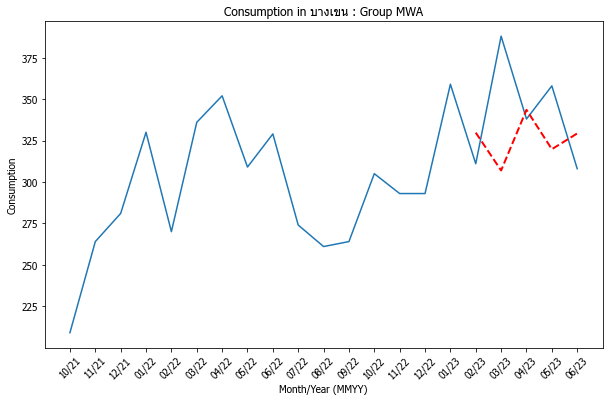

coefficient of determination: 0.1811061077458339
intercept: 1953281.1826123195
slope: [-0.43796547]
Mean Squared Error: 24636335323.362343
Mean Absolute Percent Error: 9.570121812256934
R-squared: -2.272424060899094


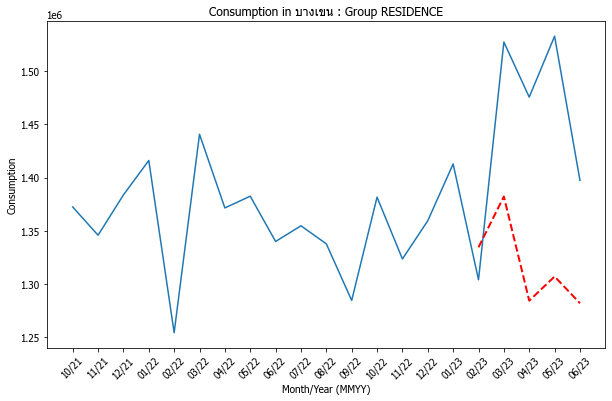

coefficient of determination: 0.23469747423609488
intercept: 13989.966285297212
slope: [0.49927239]
Mean Squared Error: 4179365.110575287
Mean Absolute Percent Error: 4.207136798120774
R-squared: -0.7751037763430111


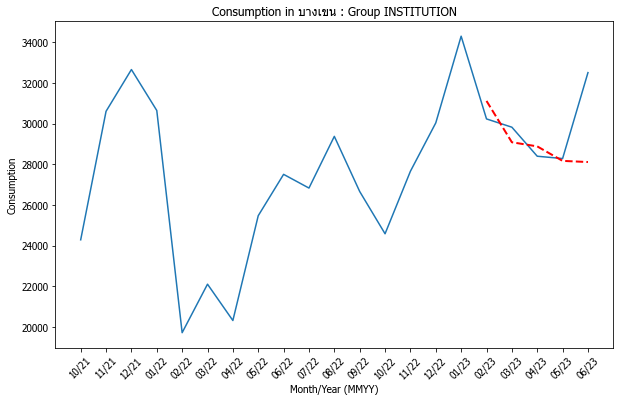

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

pv_sample =['กรุงเทพมหานคร']
ap_sample = ['ดุสิต','หนองจอก','บางเขน']

# Extract the features (x0, x1, x2) and target variable (y)
for p,pv in enumerate(pv_sample):
    for a,ap in enumerate(ap_sample):
        cs_names = dataset[pv][ap].keys()
        for c, cs in enumerate(cs_names):

            X = dataset[pv][ap][cs][['x']]
            y = dataset[pv][ap][cs]['y']

            # Split the data into training and testing sets
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=False)

            # Create a linear regression model
            model = LinearRegression()

            # Train the model on the training data
            model.fit(X_train, y_train)

            r_sq = model.score(X_train, y_train)
            print('coefficient of determination:', r_sq)

            # Print the Intercept:
            print('intercept:', model.intercept_)

            # Print the Slope:
            print('slope:', model.coef_) 

            # Make predictions on the test data
            y_pred = model.predict(X_test)

            # Evaluate the model
            mse = mean_squared_error(y_test, y_pred)
            mape = mean_absolute_percent_error(y_test, y_pred)
            r2 = r2_score(y_test, y_pred)

            print(f"Mean Squared Error: {mse}")
            print(f"Mean Absolute Percent Error: {mape}")
            print(f"R-squared: {r2}")

            plt.figure(figsize=(10, 6))
            plt.plot(pd.to_datetime(dataset[pv][ap][cs]['MMYY'], format='%m/%y').dt.strftime('%m/%y'), y)
            plt.plot(pd.to_datetime(dataset[pv][ap][cs]['MMYY'][y_test.index[0]:], format='%m/%y').dt.strftime('%m/%y'),y_pred, linestyle='--', color='red', linewidth=2)
            plt.tick_params(axis='x', labelrotation=45)
            plt.xlabel('Month/Year (MMYY)')
            plt.ylabel('Consumption')
            plt.title(f'Consumption in {ap} : Group {cs}')
            plt.show()

In [127]:
y_pred

array([367538.82196811, 369048.24557026, 366501.32832161, 367341.02291497,
       366647.39871857])

In [131]:
dataset[pv][ap]['RESIDENCE']['MMYY'][y_test.index[0]:]

16    02/23
17    03/23
18    04/23
19    05/23
20    06/23
Name: MMYY, dtype: object

In [132]:
model.predict(X_test)

array([367538.82196811, 369048.24557026, 366501.32832161, 367341.02291497,
       366647.39871857])

In [133]:
X_test

,x
16,368499
17,334388
18,391945
19,372969
20,388644
